In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os


In [16]:

# Paths and Parameters
data_dir = "C:/Users/M Amruth Sai/Downloads/project_csp/Dataset"
image_size = (128, 128)
batch_size = 32
num_classes = 3  # Number of subfolders in the dataset


In [17]:

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3708 images belonging to 4 classes.
Found 926 images belonging to 4 classes.


In [4]:

# Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:

# Callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)





In [8]:

# Training the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.5187 - loss: 0.9762

c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.74134, saving model to best_model.keras
116/116 ━━━━━━━━━━━━━━━━━━━━ 68s 566ms/step - accuracy: 0.5194 - loss: 0.9751 - val_accuracy: 0.7413 - val_loss: 0.6468
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7706 - loss: 0.6173
Epoch 2: val_accuracy did not improve from 0.74134
116/116 ━━━━━━━━━━━━━━━━━━━━ 38s 329ms/step - accuracy: 0.7705 - loss: 0.6173 - val_accuracy: 0.7348 - val_loss: 0.6493
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.7793 - loss: 0.5683
Epoch 3: val_accuracy improved from 0.74134 to 0.81494, saving model to best_model.keras
116/116 ━━━━━━━━━━━━━━━━━━━━ 37s 323ms/step - accuracy: 0.7794 - loss: 0.5681 - val_accuracy: 0.8149 - val_loss: 0.4361
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8299 - loss: 0.4430
Epoch 4: val_accuracy improved from 0.81494 to 0.83983, saving model to best_model.keras
116/116 ━━━━━━━━━━━━━━━━━━━━ 38s 324ms/step - accuracy: 0.82

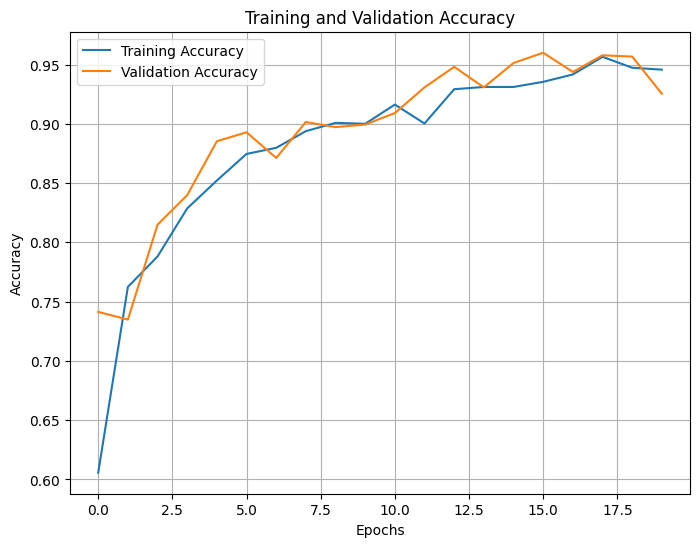

In [9]:

# Plotting Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [11]:
# Saving the model in HDF5 format
model.save("final_model.h5", save_format="h5")


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,915,083 (37.82 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,056 (25.22 MB)

In [3]:
from keras.models import load_model
model = load_model('C:/Users/M Amruth Sai/Downloads/project_csp/final_model.h5')

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [19]:

# Path to the single test image
image_path = "C:/Users/M Amruth Sai/Downloads/project_csp/Dataset/Blast/BLAST1_021.jpg"


In [20]:

# Preprocessing the image
image_size = (128, 128)  # Use the same size as the training images
img = load_img(image_path, target_size=image_size)  # Load and resize the image
img_array = img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]


In [21]:

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


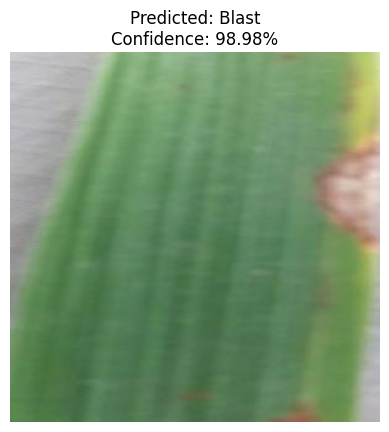

In [22]:

# Get the class labels
class_labels = list(val_generator.class_indices.keys())  # Assuming val_generator was used for validation

# Display the image with prediction
plt.imshow(load_img(image_path))
plt.axis('off')
plt.title(f"Predicted: {class_labels[predicted_class[0]]}\nConfidence: {predictions[0][predicted_class[0]] * 100:.2f}%")
plt.show()


In [37]:

# Print prediction details
print(f"Predicted Class: {class_labels[predicted_class[0]]}")
print(f"Confidence: {predictions[0][predicted_class[0]] * 100:.2f}%")


Predicted Class: Blast
Confidence: 98.16%


In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report

# Path to the single test image
# image_path = "C:/Users/M Amruth Sai/Downloads/project_csp/Dataset/Brownspot/BROWNSPOT7_193.jpg"
image_path = "C:/Users/M Amruth Sai/Downloads/project_csp/Dataset/Blast/BLAST1_011.jpg"

# Preprocessing the image
image_size = (128, 128)  # Use the same size as the training images
img = load_img(image_path, target_size=image_size)  # Load and resize the image
img_array = img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class labels (assuming val_generator was used for validation)
class_labels = list(val_generator.class_indices.keys())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


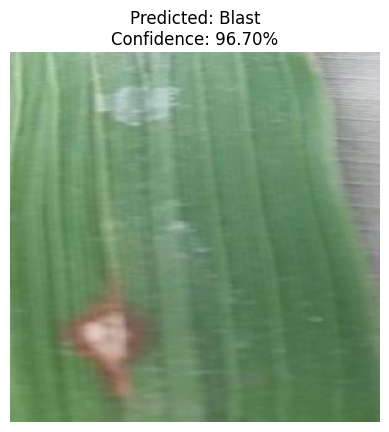

In [78]:

# Display the image with prediction
plt.imshow(load_img(image_path))
plt.axis('off')
plt.title(f"Predicted: {class_labels[predicted_class[0]]}\nConfidence: {predictions[0][predicted_class[0]] * 100:.2f}%")
plt.show()


In [54]:

# Print prediction details
print(f"Predicted Class: {class_labels[predicted_class[0]]}")
print(f"Confidence: {predictions[0][predicted_class[0]] * 100:.2f}%")


Predicted Class: Brownspot
Confidence: 98.20%


In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Path to your test dataset folder
test_dir = "C:/Users/M Amruth Sai/Downloads/project_csp/Dataset/test"  # Replace with the correct path

# Image size (same as training)
image_size = (128, 128)
batch_size = 32

# Set up ImageDataGenerator for test data (no augmentation for test set)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Since you have multiple classes
    shuffle=False  # Important: Don't shuffle for evaluation
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 12 images belonging to 3 classes.


c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7500 - loss: 0.6575
Test Accuracy: 75.00%


In [70]:

# Get true labels and predicted labels
true_labels = test_generator.classes  # True labels from the test set
predictions = model.predict(test_generator, verbose=1)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Get the class with the highest probability

# Get class labels
class_labels = list(test_generator.class_indices.keys())  # Get class names from the generator

# Print the classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

Classification Report:
                  precision    recall  f1-score   support

bacterial_blight       0.75      0.75      0.75         4
           blast       0.60      0.75      0.67         4
       brownspot       1.00      0.75      0.86         4

        accuracy                           0.75        12
       macro avg       0.78      0.75      0.76        12
    weighted avg       0.78      0.75      0.76        12



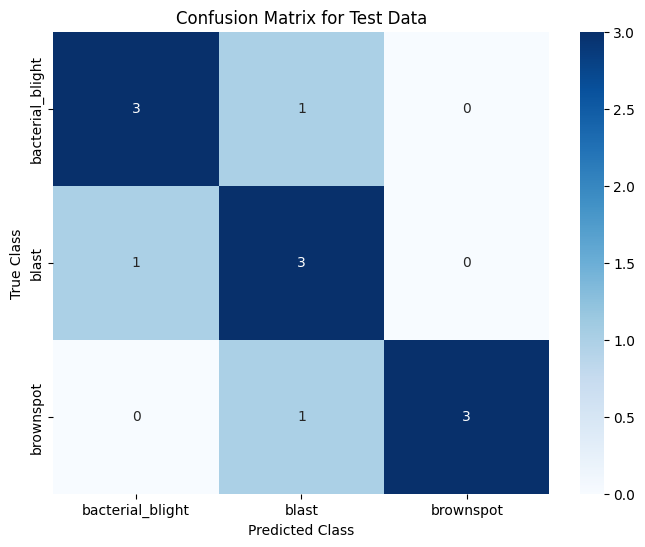

In [71]:

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Test Data")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()
